In [18]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm 
import utils.plot_utils as plu
from tqdm import tqdm
import numpy as np
import pickle
from signal_processing import sr_processing as sr
from hu_classes.hu_dataloader import matrics_loader
import signal_processing.subsetter as sset
import numpy as np
from utils import plot_utils as plu
import utils.data_extraction as datrac
import pandas as pd
import utils.summarize as summer 

# Extract SSP and VISp inter-region connectivity

In [21]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    metrics_test = matrics_loader(session_path)
    metrics_test.load_session_matrics()
    cell_type = metrics_test.label_dic['cell_type']
    regions = metrics_test.label_dic['region']
    layers = metrics_test.label_dic['layer']
    tar_reg = 'SSp'
    data_dic = {}
    for i in metrics_test.corr.keys():
        coor_mat = metrics_test.corr[i][(7777,7777,7777)]
        SSp_matrix, SSp_layer_labels, layer_info = sset.subset_and_organize_matrices(regions, layers, coor_mat, tar_reg)
        strengths = np.linalg.norm(SSp_matrix,axis=1)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(SSp_layer_labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"SSp_interconnectivity.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)


100%|██████████| 11/11 [00:12<00:00,  1.36it/s]

In [22]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
pbar = tqdm(total = len(os.listdir(dat_spike_paths)), leave = True)
for session_path in os.listdir(dat_spike_paths):
    session_path = os.path.join(dat_spike_paths,session_path)
    metrics_test = matrics_loader(session_path)
    metrics_test.load_session_matrics()
    cell_type = metrics_test.label_dic['cell_type']
    regions = metrics_test.label_dic['region']
    layers = metrics_test.label_dic['layer']
    tar_reg = [i for i in np.unique(regions).tolist() if 'VIS' in i][0]
    data_dic = {}
    for i in metrics_test.corr.keys():
        coor_mat = metrics_test.corr[i][(7777,7777,7777)]
        SSp_matrix, SSp_layer_labels, layer_info = sset.subset_and_organize_matrices(regions, layers, coor_mat, tar_reg)
        strengths = np.linalg.norm(SSp_matrix,axis=1)
        layer_data_results = sset.group_data_by_hardcoded_layers_compatible(SSp_layer_labels,strengths)
        data_dic[i] = layer_data_results
    save_filename = f"VISp_interconnectivity.pkl"
    save_path = os.path.join(session_path, save_filename)
    with open(save_path, 'wb') as f:
        pickle.dump(data_dic, f)
    pbar.update(1)


100%|██████████| 11/11 [00:12<00:00,  1.13s/it]


# Single Animal Plotting 

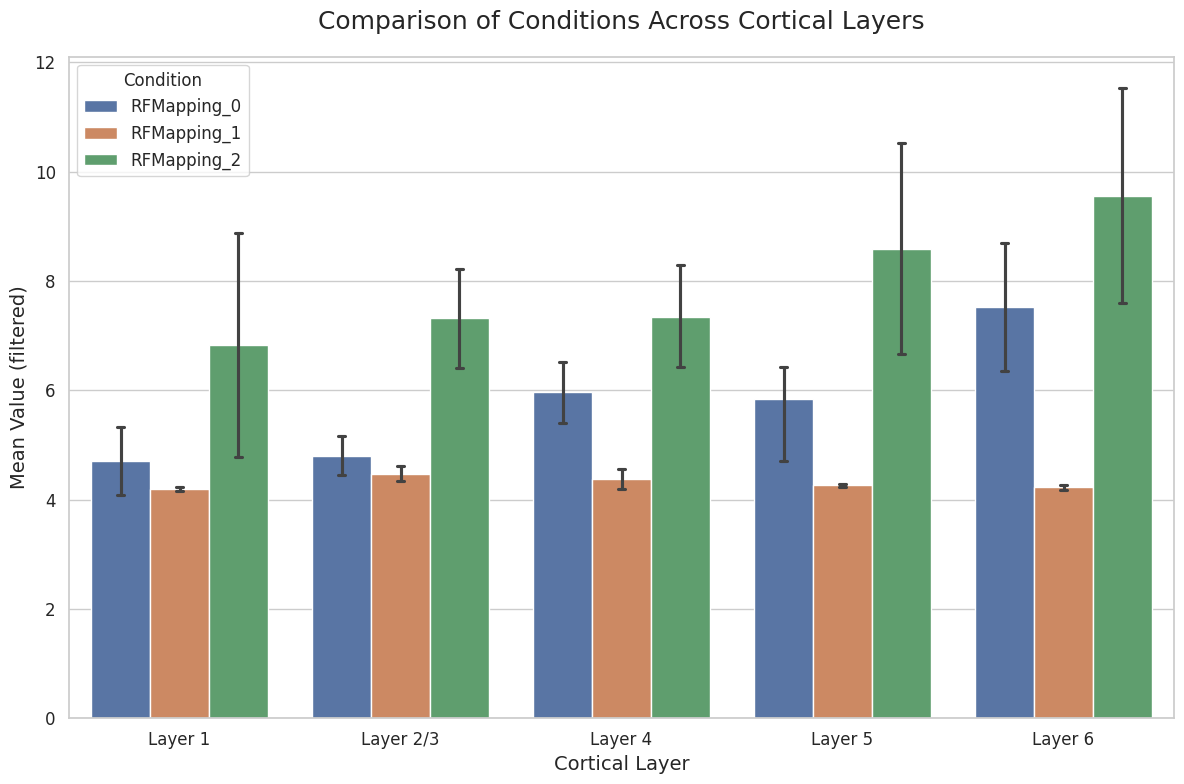

In [4]:
plu.plot_grouped_layer_barplot_robust(data_dic)

In [8]:
session = '/home/tony/Halluci-Nations/scratch/ecephys_717033_2024-06-04_13-01-40_nwb_2025-08-03_21-11-22'
metrics_test = matrics_loader(session)
metrics_test.load_session_matrics()
cell_type = metrics_test.label_dic['cell_type']
regions = metrics_test.label_dic['region']
layers = metrics_test.label_dic['layer']
tar_reg = 'SSp'
data_dic = {}
for i in metrics_test.corr.keys():
    coor_mat = metrics_test.corr[i][(7777,7777,7777)]
    SSp_matrix, SSp_layer_labels, layer_info = sr.subset_and_organize_matrices(regions, layers, coor_mat, tar_reg)
    strengths = np.linalg.norm(SSp_matrix,axis=1)
    layer_data_results = sr.group_data_by_hardcoded_layers_compatible(SSp_layer_labels,strengths)
    data_dic[i] = layer_data_results

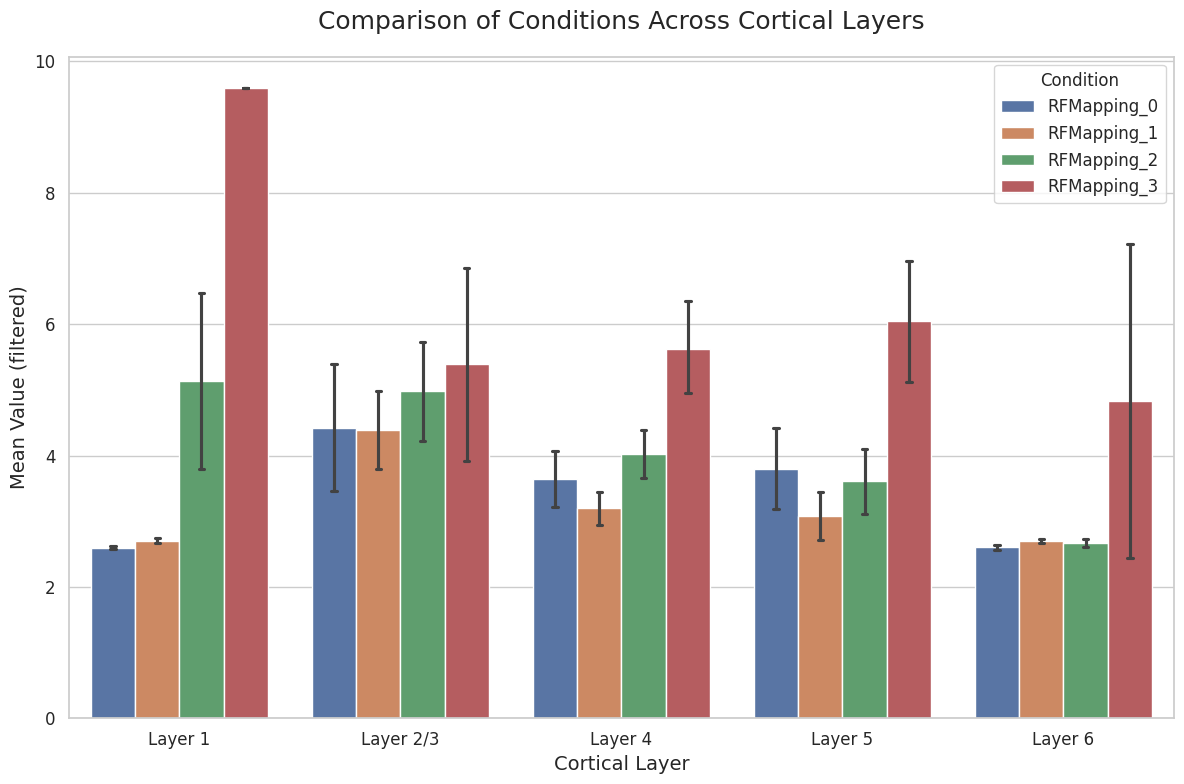

In [9]:
plu.plot_grouped_layer_barplot_robust(data_dic)

# Generating summary df across animals 

In [2]:
dat_spike_paths = '/home/tony/Halluci-Nations/scratch/'
post, pre = sset.find_directories_with_rfmapping(dat_spike_paths)
save_path = '/home/tony/Halluci-Nations/results'

In [5]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_interconnectivity.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'SSp_interconnectivity.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_ssp = pd.concat(all_dfs)
final_df_ssp.to_csv(f'{save_path}/ssp_inter_connectivity.csv')

In [6]:
pre_dfs = []
for session in pre:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'VISp_interconnectivity.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe(data)
    df_temp['session'] = 'sal'
    df_temp['subject'] = subject_id
    pre_dfs.append(df_temp)
post_dfs = []
for session in post:
    subject_id = sset.extract_subject_id(session)
    data_path = os.path.join(session,'VISp_interconnectivity.pkl')
    data = datrac.load_pickle(data_path)
    df_temp = summer.create_tidy_dataframe(data)
    df_temp['session'] = 'psy'
    df_temp['subject'] = subject_id
    post_dfs.append(df_temp)
all_dfs = pre_dfs + post_dfs
final_df_visp = pd.concat(all_dfs)
final_df_visp.to_csv(f'{save_path}/visp_inter_connectivity.csv')

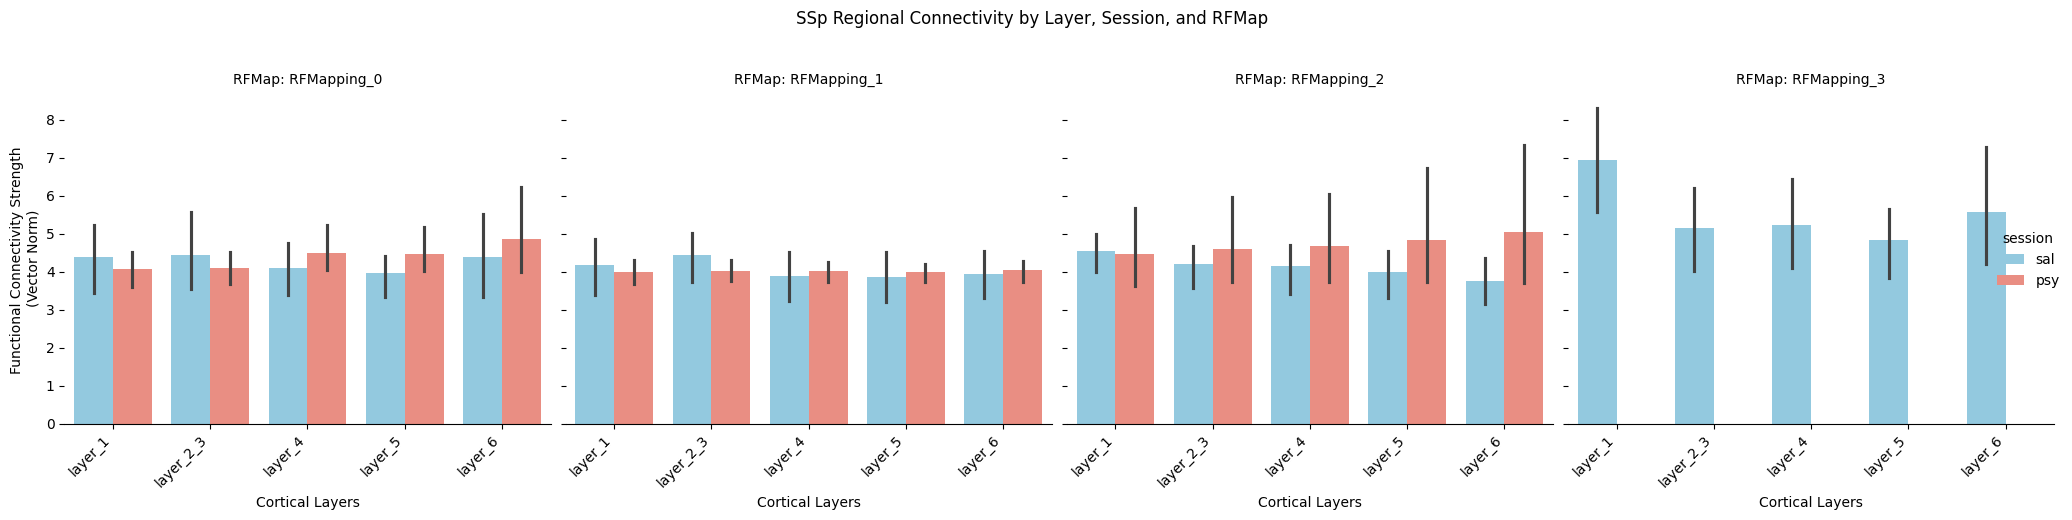

In [12]:
g = sns.catplot(
    data=final_df_ssp,
    x='layers',
    y='mean',
    hue='session',
    col='RFmaps',  # This creates sub-plots for each RFmap, which is cleaner
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'}, # Custom colors
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('SSp Regional Connectivity by Layer, Session, and RFMap', y=1.03) # Add a main title
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)") # Set axis labels
g.set_titles("RFMap: {col_name}") # Customize subplot titles
g.despine(left=True) # Remove the top and right spines for a cleaner look

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout to make sure everything fits
plt.tight_layout()

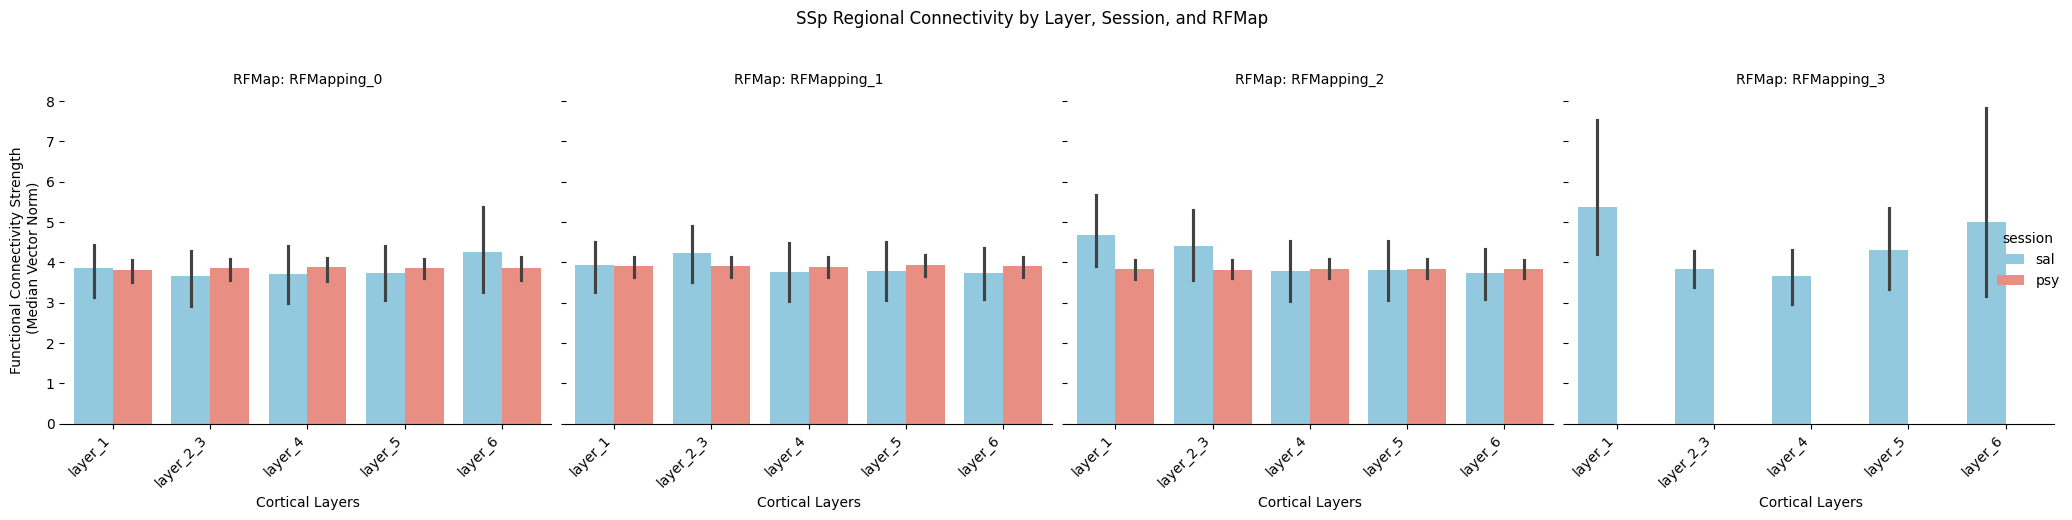

In [14]:
g = sns.catplot(
    data=final_df_ssp,
    x='layers',
    y='median',
    hue='session',
    col='RFmaps',  # This creates sub-plots for each RFmap, which is cleaner
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'}, # Custom colors
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('SSp Regional Connectivity by Layer, Session, and RFMap', y=1.03) # Add a main title
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Median Vector Norm)") # Set axis labels
g.set_titles("RFMap: {col_name}") # Customize subplot titles
g.despine(left=True) # Remove the top and right spines for a cleaner look

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout to make sure everything fits
plt.tight_layout()

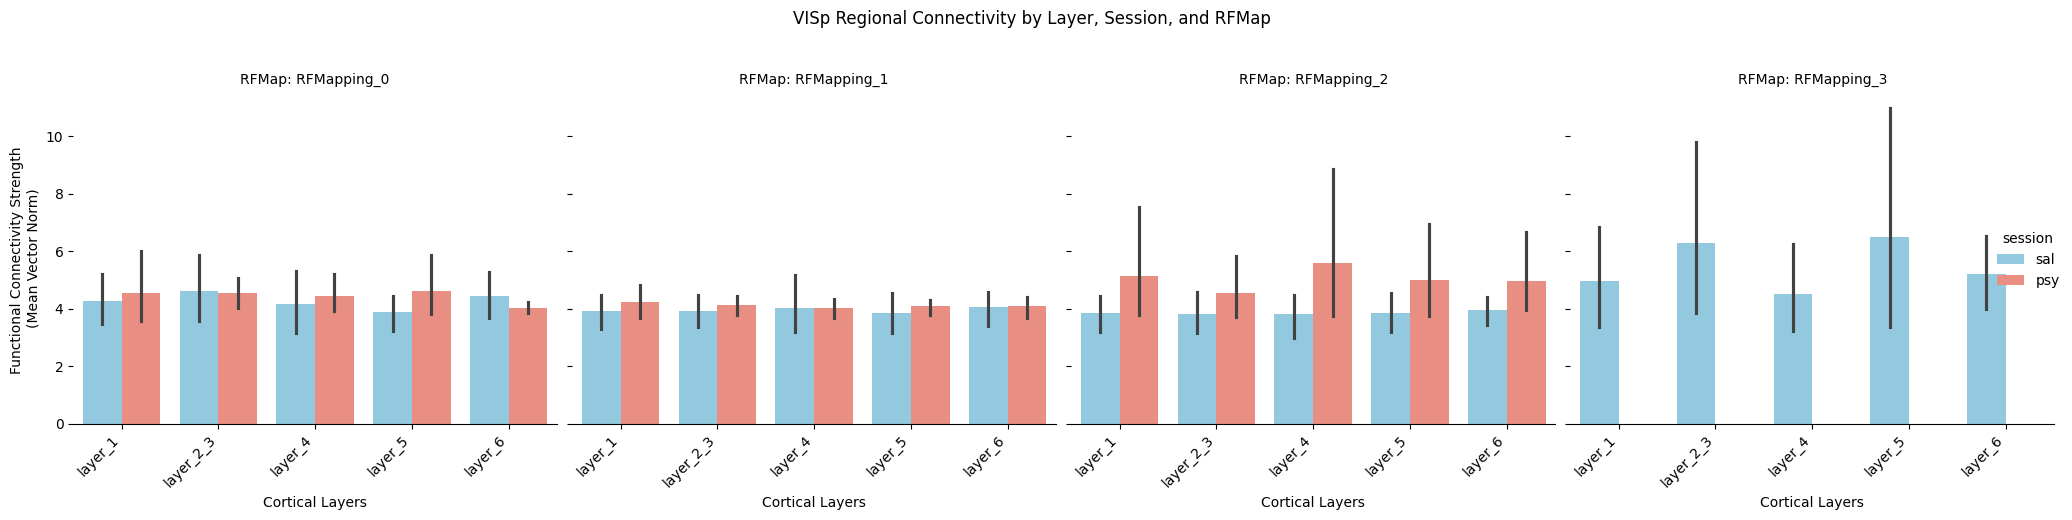

In [16]:
g = sns.catplot(
    data=final_df_visp,
    x='layers',
    y='mean',
    hue='session',
    col='RFmaps',  # This creates sub-plots for each RFmap, which is cleaner
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'}, # Custom colors
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('VISp Regional Connectivity by Layer, Session, and RFMap', y=1.03) # Add a main title
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Mean Vector Norm)") # Set axis labels
g.set_titles("RFMap: {col_name}") # Customize subplot titles
g.despine(left=True) # Remove the top and right spines for a cleaner look

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout to make sure everything fits
plt.tight_layout()

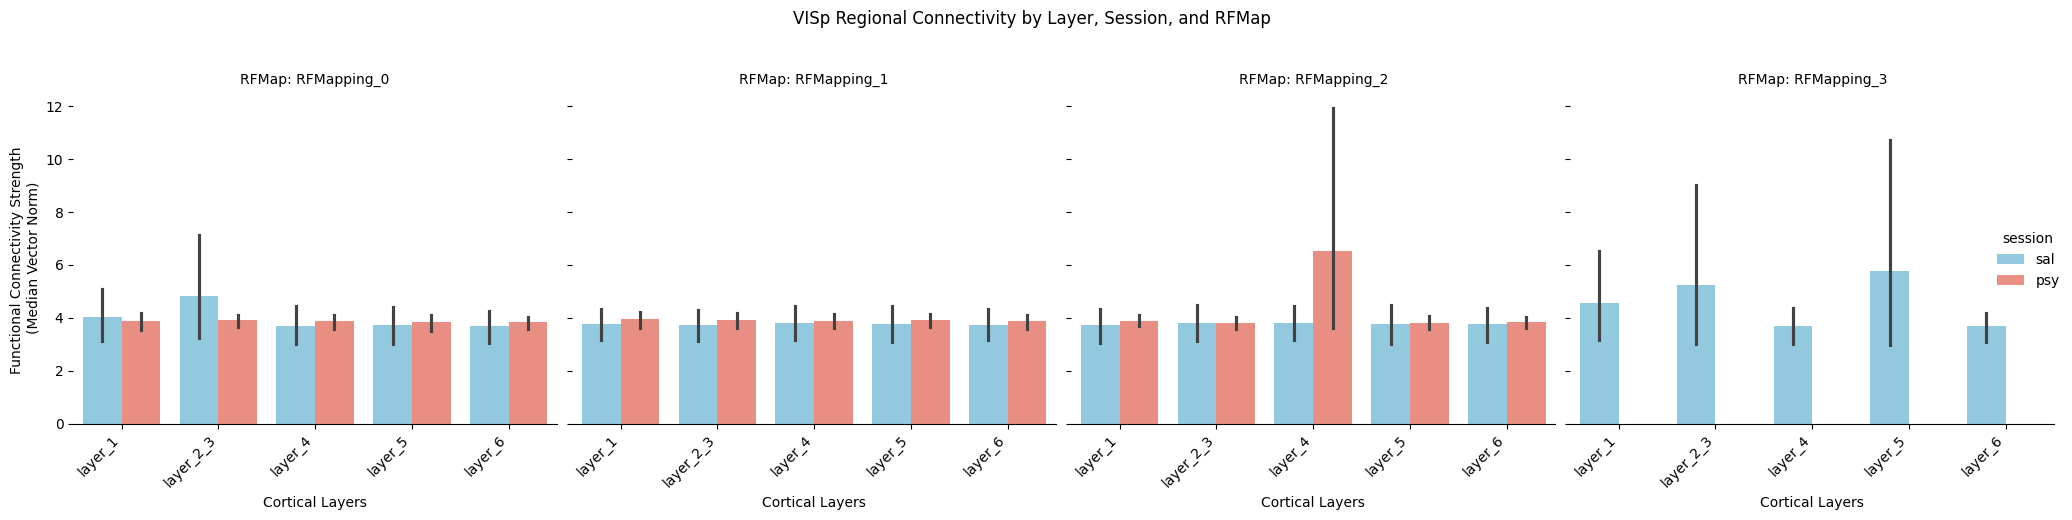

In [17]:
g = sns.catplot(
    data=final_df_visp,
    x='layers',
    y='median',
    hue='session',
    col='RFmaps',  # This creates sub-plots for each RFmap, which is cleaner
    kind='bar',
    palette={'sal': 'skyblue', 'psy': 'salmon'}, # Custom colors
    legend_out=True
)

# 3. Customize the plot for better readability
g.fig.suptitle('VISp Regional Connectivity by Layer, Session, and RFMap', y=1.03) # Add a main title
g.set_axis_labels("Cortical Layers", "Functional Connectivity Strength \n(Median Vector Norm)") # Set axis labels
g.set_titles("RFMap: {col_name}") # Customize subplot titles
g.despine(left=True) # Remove the top and right spines for a cleaner look

# Rotate x-axis labels to prevent overlap
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Adjust layout to make sure everything fits
plt.tight_layout()